# **AIMS | Monte Carlo Mehtods for Machine Learning**

# **Problems for week 1:Random variables and sampling**

Astride Melvin Fokam Ninyim

Last updated: 10 Nov 2025

Python 3

Reference:
-  https://www.geeksforgeeks.org/engineering-mathematics/random-variable/

- https://www.geeksforgeeks.org/maths/histogram/
- https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform

- https://www.geeksforgeeks.org/dsa/estimating-value-pi-using-monte-carlo/

- https://www.geeksforgeeks.org/artificial-intelligence/markov-chain-monte-carlo-mcmc/

# **Practive**

### Q1. **Common random variables**. Calculate the mean, variance, and characteristic function of the following random variables:

### (a) Bernoulli($p$)

A random variable $X$ following a Bernoulli($p$) distribution:

$$
P(X = 1) = p, \quad P(X = 0) = 1 - p
$$

---

#### 1. Mean $E(X)$:

$$
E(X) = \sum_x x P(X = x)
$$
$$
E(X) = 0 \cdot (1 - p) + 1 \cdot p
$$

$$
\boxed{E(X) = p}
$$

---

#### 2. Variance $\mathrm{Var}(X)$:

$$
\mathrm{Var}(X) = E(X^2) - [E(X)]^2
$$
$$
E(X^2) = \sum_x x^2 P(X = x)
       = 0^2 \cdot (1 - p) + 1^2 \cdot p = p
$$
$$
\mathrm{Var}(X) = p - p^2
$$

$$
\boxed{\mathrm{Var}(X) = p(1 - p)}
$$

---

#### 3. Characteristic Function $\phi_X(t)$:

$$
\phi_X(t) = E[e^{itX}] = \sum_x e^{itx} P(X = x)
$$
$$
\phi_X(t) = e^{it \cdot 0}(1 - p) + e^{it \cdot 1}p
$$

$$
\boxed{\phi_X(t) = 1 - p + p e^{it}}
$$


### (b) Binomial  with parameters $(n, p)$

The probability mass function is:

$$
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

---

#### 1. Mean  $E(X)$:

$$
E(X) = \sum_{k=0}^{n} k P(X=k) = \sum_{k=0}^{n} k \binom{n}{k} p^k (1-p)^{n-k}
$$

Since the term for $k=0$ is zero, we start summation at $k=1$:

$$
E(X) = \sum_{k=1}^{n} k \binom{n}{k} p^k (1-p)^{n-k}
$$

Using the combinatorial identity $k \binom{n}{k} = n \binom{n-1}{k-1}$:

$$
E(X) = \sum_{k=1}^{n} n \binom{n-1}{k-1} p^k (1-p)^{n-k}
$$

Factor out $np$ and rewrite powers:

$$
E(X) = n p \sum_{k=1}^{n} \binom{n-1}{k-1} p^{k-1} (1-p)^{(n-1)-(k-1)}
$$

Let $j = k-1$ (then $j=0$ to $n-1$):

$$
E(X) = n p \sum_{j=0}^{n-1} \binom{n-1}{j} p^j (1-p)^{(n-1)-j}
$$

By the binomial theorem, the sum equals 1:

$$
\boxed{E(X) = n p}
$$

---

#### 2. Variance $Var(X)$:

Variance formula:

$$
Var(X) = E(X^2) - [E(X)]^2
$$

Compute $E[X(X-1)]$ first:

$$
E[X(X-1)] = \sum_{k=0}^{n} k(k-1) \binom{n}{k} p^k (1-p)^{n-k}
$$

Since $k=0$ and $k=1$ terms are zero, sum starts at $k=2$:

$$
E[X(X-1)] = \sum_{k=2}^{n} k(k-1) \binom{n}{k} p^k (1-p)^{n-k}
$$

Use identity $k(k-1) \binom{n}{k} = n(n-1) \binom{n-2}{k-2}$:

$$
E[X(X-1)] = \sum_{k=2}^{n} n(n-1) \binom{n-2}{k-2} p^k (1-p)^{n-k}
$$

Factor out $n(n-1)p^2$:

$$
E[X(X-1)] = n(n-1)p^2 \sum_{k=2}^{n} \binom{n-2}{k-2} p^{k-2} (1-p)^{(n-2)-(k-2)}
$$

Let $j = k-2$ ($j=0$ to $n-2$). By the binomial theorem, the sum equals 1:

$$
E[X(X-1)] = n(n-1) p^2
$$

Use $E(X^2) = E[X(X-1)] + E[X]$:

$$
E(X^2) = n(n-1)p^2 + np
$$

Then the variance:

$$
Var(X) = E(X^2) - [E(X)]^2 = [n(n-1)p^2 + np] - (np)^2
$$

Simplify:

$$
Var(X) = np - np^2 = np(1-p)
$$

$$
\boxed{Var(X) = n p (1-p)}
$$

---

#### 3. Characteristic Function $\phi_X(t)$:

$$
\phi_X(t) = E[e^{itX}] = \sum_{k=0}^{n} e^{itk} P(X=k)
$$

Substitute the PMF:

$$
\phi_X(t) = \sum_{k=0}^{n} e^{itk} \binom{n}{k} p^k (1-p)^{n-k}
$$

Rewrite powers:

$$
\phi_X(t) = \sum_{k=0}^{n} \binom{n}{k} (p e^{it})^k (1-p)^{n-k}
$$

By the binomial theorem:

$$
\boxed{\phi_X(t) = (1 - p + p e^{it})^n}
$$


### (c) Gaussian  $X \sim \mathcal{N}(\mu,\sigma^2)$

The probability density function  is:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

---

#### 1. Mean  $E(X)$:

$$
E(X) = \int_{-\infty}^{+\infty} x f(x) \, dx
$$

Substitute $y = x - \mu \implies x = y + \mu, \, dx = dy$:

$$
E(X) = \int_{-\infty}^{+\infty} \frac{y + \mu}{\sigma\sqrt{2\pi}} e^{-\frac{y^2}{2\sigma^2}} \, dy
$$

Split the integral:

$$
E(X) = \underbrace{\int_{-\infty}^{+\infty} \frac{y}{\sigma\sqrt{2\pi}} e^{-\frac{y^2}{2\sigma^2}} dy}_{0 \text{ (odd function)}} +
       \mu \underbrace{\int_{-\infty}^{+\infty} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{y^2}{2\sigma^2}} dy}_{1}
$$

$$
\boxed{E(X) = \mu}
$$

---

#### 2. Variance $Var(X)$:

Variance formula:

$$
Var(X) = E(X^2) - [E(X)]^2
$$

Compute $E(X^2)$ using $x^2 = (x-\mu)^2 + 2\mu(x-\mu) + \mu^2$:

$$
E(X^2) = \underbrace{\int_{-\infty}^{+\infty} (x-\mu)^2 f(x) dx}_{\sigma^2} +
         \underbrace{2\mu \int_{-\infty}^{+\infty} (x-\mu) f(x) dx}_{0} +
         \underbrace{\mu^2 \int_{-\infty}^{+\infty} f(x) dx}_{\mu^2}
$$

$$
E(X^2) = \sigma^2 + \mu^2
$$

Then the variance:

$$
Var(X) = E(X^2) - [E(X)]^2 = (\sigma^2 + \mu^2) - \mu^2
$$

$$
\boxed{Var(X) = \sigma^2}
$$

---

#### 3. Characteristic Function $\phi_X(t)$:

$$
\phi_X(t) = E[e^{itX}] = \int_{-\infty}^{+\infty} e^{itx} f(x) \, dx
$$

Substitute the PDF:

$$
\phi_X(t) = \int_{-\infty}^{+\infty} \frac{1}{\sigma\sqrt{2\pi}}
            \exp\Big(itx - \frac{(x-\mu)^2}{2\sigma^2}\Big) dx
$$

Complete the square in the exponent:

$$
itx - \frac{(x-\mu)^2}{2\sigma^2} = -\frac{(x-(\mu+i\sigma^2 t))^2}{2\sigma^2} + i \mu t - \frac{1}{2} \sigma^2 t^2
$$

Factor out the $x$-independent term:

$$
\phi_X(t) = e^{i \mu t - \frac{1}{2} \sigma^2 t^2} \underbrace{\int_{-\infty}^{+\infty} \frac{1}{\sigma \sqrt{2\pi}}
\exp\Big(-\frac{(x-(\mu + i \sigma^2 t))^2}{2\sigma^2}\Big) dx}_{1}
$$

$$
\boxed{\phi_X(t) = e^{i \mu t - \frac{1}{2} \sigma^2 t^2}}
$$


### (d) Exponential :($\lambda$)



$$
p(x) = \lambda e^{-\lambda x},  \quad x \ge 0
$$

---

#### 1. Mean  $E(X)$:

$$
E(X) = \int_{0}^{\infty} x \lambda e^{-\lambda x} \, dx
$$

Using integration by parts:

$$
E(X) = \left[-x e^{-\lambda x}\right]_0^\infty - \int_{0}^{\infty} (- e^{-\lambda x}) dx
$$

$$
\boxed{E(X) = \frac{1}{\lambda}}
$$

---

#### 2. Variance $Var(X)$:

Variance formula:

$$
Var(X) = E(X^2) - [E(X)]^2
$$

With $E(X^2) = \frac{2}{\lambda^2}$:

$$
Var(X) = \frac{2}{\lambda^2} - \left(\frac{1}{\lambda}\right)^2
$$

$$
\boxed{Var(X) = \frac{1}{\lambda^2}}
$$

---

#### 3. Characteristic Function $\phi_X(t)$

$$
\phi_X(t) = E[e^{itX}] = \lambda \int_{0}^{\infty} e^{-(\lambda - it)x} \, dx
$$

$$
\phi_X(t) = \lambda \left[\frac{e^{-(\lambda - it)x}}{-(\lambda - it)}\right]_0^\infty
$$

$$
\boxed{\phi_X(t) = \frac{\lambda}{\lambda - i t}}
$$


### (e) Uniform  over $[0, L]$

The probability density function (PDF) is:

$$
f(x) = \frac{1}{L}, \quad 0 \le x \le L
$$

---

#### 1. Mean  $E(X)$:

$$
E(X) = \int_{0}^{L} x \frac{1}{L} \, dx = \frac{1}{L} \left[\frac{x^2}{2}\right]_0^L
$$

$$
\boxed{E(X) = \frac{L}{2}}
$$

---

#### 2. Variance $Var(X)$:

Compute $E(X^2)$:

$$
E(X^2) = \int_{0}^{L} x^2 \frac{1}{L} \, dx = \frac{L^2}{3}
$$

Then variance:

$$
Var(X) = E(X^2) - [E(X)]^2 = \frac{L^2}{3} - \frac{L^2}{4}
$$

$$
\boxed{Var(X) = \frac{L^2}{12}}
$$

---

#### 3. Characteristic Function $\phi_X(t)$:

$$
\phi_X(t) = \int_{0}^{L} e^{itx} \frac{1}{L} \, dx = \frac{1}{L} \left[\frac{e^{itx}}{i t}\right]_0^L
$$

$$
\boxed{\phi_X(t) = \frac{e^{i t L} - 1}{i t L}}
$$


# **Theoretical**

### Q2. Sum of IID Gaussian Random Variables

We show that the sum of independent and identically distributed (IID) Gaussian random variables is also Gaussian.

---

### Demonstration via Characteristic Functions

A random variable $Z$ is Gaussian if and only if its characteristic function has the form:

$$
\phi_Z(t) = \exp\Big(i \mu_Z t - \frac{1}{2} \sigma_Z^2 t^2 \Big)
$$

---

#### Case: Sum of Two IID Gaussians

Let $X_1$ and $X_2$ be IID Gaussian random variables:

$$
X_i \sim \mathcal{N}(\mu, \sigma^2)
$$

The characteristic function of each $X_i$ is:

$$
\phi_{X_i}(t) = \exp\Big(i \mu t - \frac{1}{2} \sigma^2 t^2 \Big)
$$

Define the sum:

$$
Z = X_1 + X_2
$$

Since $X_1$ and $X_2$ are independent, the characteristic function of the sum is the product of the individual characteristic functions:

$$
\phi_Z(t) = \phi_{X_1}(t) \cdot \phi_{X_2}(t)
$$

Substitute and simplify:

$$
\phi_Z(t) = \left( e^{i \mu t - \frac{1}{2} \sigma^2 t^2} \right) \cdot \left( e^{i \mu t - \frac{1}{2} \sigma^2 t^2} \right)
$$

$$
\phi_Z(t) = e^{i (2\mu) t - \frac{1}{2} (2\sigma^2) t^2}
$$

This is exactly the characteristic function of a Gaussian with mean $2\mu$ and variance $2\sigma^2$:

$$
\boxed{Z \sim \mathcal{N}(2\mu, 2\sigma^2)}
$$

---

#### Generalisation: Sum of $n$ IID Gaussians

Let:

$$
Z_n = \sum_{i=1}^{n} X_i, \quad X_i \sim \mathcal{N}(\mu, \sigma^2) \text{ IID}
$$

The characteristic function of $Z_n$ is the product of $n$ individual characteristic functions:

$$
\phi_{Z_n}(t) = \prod_{i=1}^{n} \phi_{X_i}(t) = \prod_{i=1}^{n} \left( e^{i \mu t - \frac{1}{2} \sigma^2 t^2} \right)
$$

Combine the exponents:

$$
\phi_{Z_n}(t) = e^{\sum_{i=1}^{n} \left(i \mu t - \frac{1}{2} \sigma^2 t^2 \right)} = e^{i (n \mu) t - \frac{1}{2} (n \sigma^2) t^2}
$$

This is the characteristic function of a Gaussian with mean $n \mu$ and variance $n \sigma^2$:

$$
\boxed{Z_n \sim \mathcal{N}(n \mu, n \sigma^2)}
$$

**Conclusion:**  
The sum of any number of independent Gaussian random variables is also Gaussian, with mean equal to the sum of individual means and variance equal to the sum of individual variances.



### Q3. Log-normal random variable. Let $X \sim \mathcal{N}(\mu, \sigma^2)$ and define $Y = e^X$. Find the probability density of $Y$.



The random variable $Y = e^X$ is a log-normal random variable. We find its probability density function (PDF) $f_Y(y)$ using the method of transformation of random variables.

The general formula for the PDF of a transformed variable $Y = g(X)$ is:
$$f_Y(y) = f_X(g^{-1}(y)) \left| \frac{d}{dy} g^{-1}(y) \right|$$

**1. Define the transformation and its inverse:**
The transformation is $Y = g(X) = e^X$.
The inverse transformation is $X = g^{-1}(Y) = \ln(Y)$.

**2. Determine the PDF of $X$ and the domain of $Y$:**
The PDF of $X \sim \mathcal{N}(\mu, \sigma^2)$ is:
$$f_X(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
Since $Y = e^X$, the domain of $Y$ is $y \in (0, \infty)$.

**3. Calculate the Jacobian (derivative) of the inverse transformation:**
We take the derivative of $X = \ln(Y)$ with respect to $y$:
$$\frac{d}{dy} g^{-1}(y) = \frac{d}{dy} \ln(y) = \frac{1}{y}$$
Since $y > 0$, the absolute value of the derivative is $\left| \frac{1}{y} \right| = \frac{1}{y}$.

**4. Substitute all terms into the transformation formula:**
Substitute $x = \ln(y)$ into $f_X(x)$:
$$f_X(\ln(y)) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(\ln(y)-\mu)^2}{2\sigma^2}\right)$$

Combine the substituted PDF and the Jacobian:
$$f_Y(y) = f_X(\ln(y)) \cdot \left| \frac{1}{y} \right|$$
$$f_Y(y) = \left[ \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(\ln(y)-\mu)^2}{2\sigma^2}\right) \right] \cdot \frac{1}{y}$$

The probability density function of $Y$ is:
$$f_Y(y) = \frac{1}{y\sigma\sqrt{2\pi}} \exp\left(-\frac{(\ln(y)-\mu)^2}{2\sigma^2}\right), \quad \text{for } y > 0$$
and $f_Y(y) = 0$ for $y \le 0$.

# **Numerical**

In [37]:
#import the requirements librairies

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import networkx as nx
import random



### Q4 Histogram function.

Construct a function called myhistogram(v,a,b,n) that constructs a histogram of  the values contained in the vector v in n bins spread uniformly in the interval a; b. The output of your
function is the vector of histogram counts. Show that your function works
correctly by comparing it with the similar histogram function available in Matlab, R or Python.

In [38]:
def myhistogram(v, a, b, n):

    bin_width = (b - a) / n

    counts = np.zeros(n, dtype=int)

    for x in v:
        if a <= x < b:
            index = int((x - a) / bin_width)
            counts[index] += 1
        elif x == b:
            counts[-1] += 1

    return counts


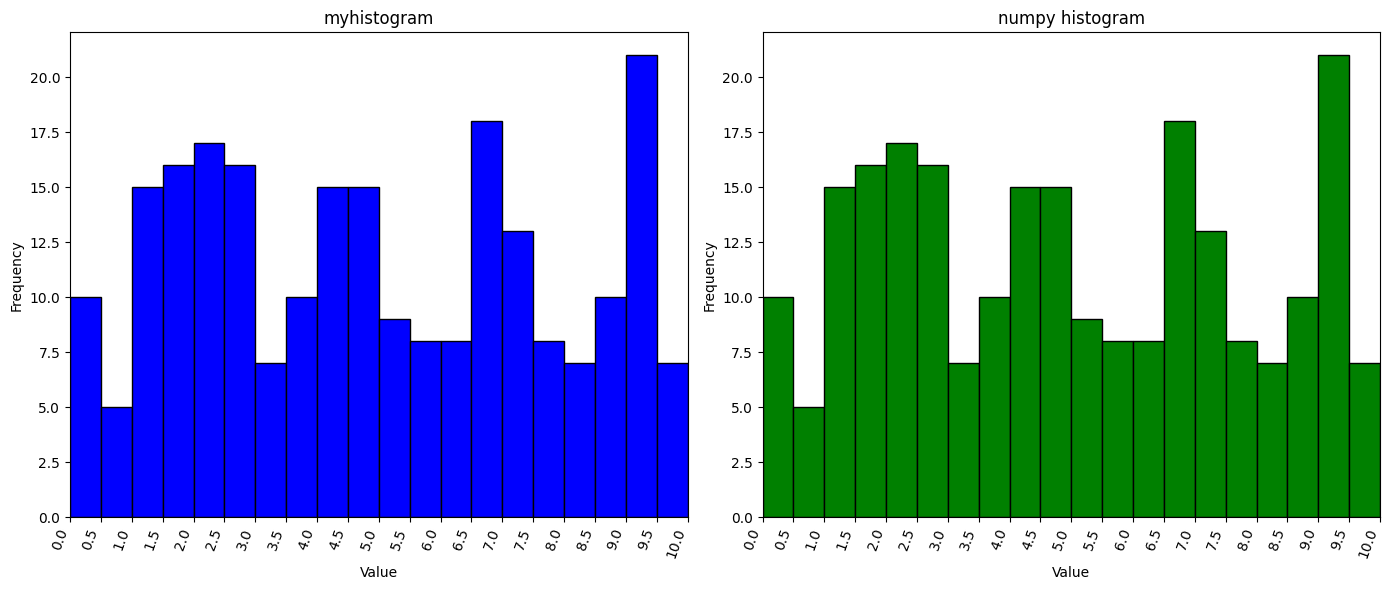

In [56]:
v = np.random.uniform(0, 10, 235)
a, b, n = 0, 10, 20
my_counts = myhistogram(v, a, b, n)
np_counts, np_bins = np.histogram(v, bins=n, range=(a, b))
bin_edges = np.linspace(a, b, n + 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
bin_width = (b - a) / n
axes[0].bar(bin_edges[:-1], my_counts, width=bin_width, color='blue', edgecolor='black', align='edge')
axes[0].set_xticks(bin_edges)
axes[0].set_xticklabels([f'{edge:.1f}' for edge in bin_edges], rotation=70, ha='right')
axes[0].set_title('myhistogram')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(a, b)

axes[1].bar(np_bins[:-1], np_counts, width=np_bins[1] - np_bins[0], color='green', edgecolor='black', align='edge')
axes[1].set_xticks(np_bins)
axes[1].set_xticklabels([f'{edge:.1f}' for edge in np_bins], rotation=70, ha='right')
axes[1].set_title('numpy histogram')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(a, b)

plt.tight_layout()
plt.show()

### Q5. Non-uniform variates.

Use the transformation method to construct random number generators for the following probability distributions and test them with large-enough samples by plotting the sample histogram (properly normalised) with the corresponding theoretical distribution.



### (a) Random choice in a list [1, 2,...,n] of n values with probability given in the list [p1, p2,.......,pn].


In [41]:
def discrete_choice(values, probs, size=20000):

    cdf = np.cumsum(probs)
    u = np.random.rand(size)
    samples = np.zeros(size, dtype=int)

    for i in range(size):
        samples[i] = values[np.searchsorted(cdf, u[i])]
    return samples

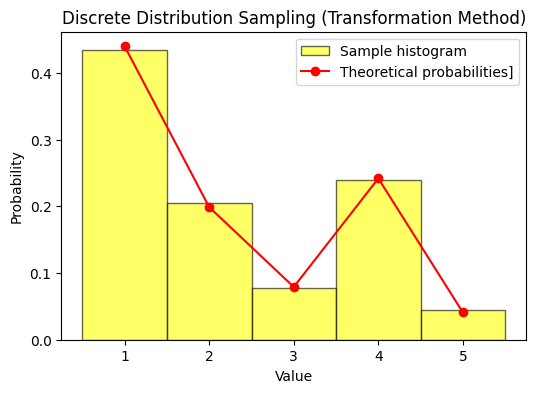

In [42]:
values = np.arange(1, 6)
probs = np.random.dirichlet(np.ones(5))
samples = discrete_choice(values, probs, size=15000)

plt.figure(figsize=(6,4))
plt.hist(samples, bins=np.arange(0.5, 6.5, 1), density=True, alpha=0.6, color='yellow', edgecolor='black', label='Sample histogram')
plt.plot(values, probs, 'ro-', label='Theoretical probabilities]')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Discrete Distribution Sampling (Transformation Method)')
plt.legend()
plt.show()


In [43]:
def discrete_choice(values, probs, size=33000):

    cdf = np.cumsum(probs)
    u = np.random.rand(size)
    samples = np.zeros(size, dtype=int)

    for i in range(size):
        samples[i] = values[np.searchsorted(cdf, u[i])]
    return samples


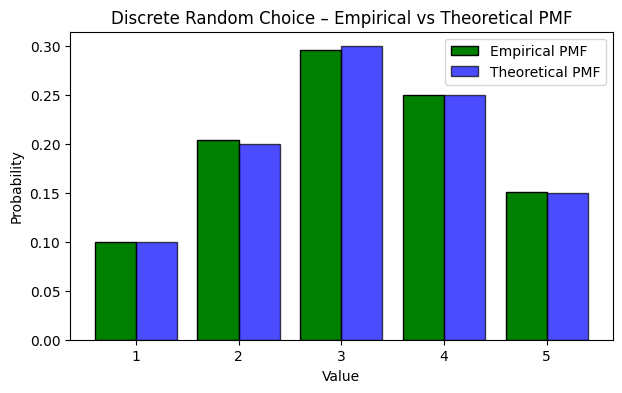

In [44]:
values = np.arange(1, 6)
probs = np.array([0.1, 0.2, 0.3, 0.25, 0.15])
samples = discrete_choice(values, probs, size=33000)
unique, counts = np.unique(samples, return_counts=True)
empirical_p = counts / len(samples)


plt.figure(figsize=(7, 4))
plt.bar(values - 0.2, empirical_p, width=0.4, label='Empirical PMF', color='green', edgecolor='black')
plt.bar(values + 0.2, probs, width=0.4, label='Theoretical PMF', color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Discrete Random Choice – Empirical vs Theoretical PMF')
plt.legend()
plt.show()



### (b) Uniform over [-1,1] .


In [45]:
def uniform_minusone_one(size=10000):
    u = np.random.rand(size)
    x = 2*u - 1
    return x

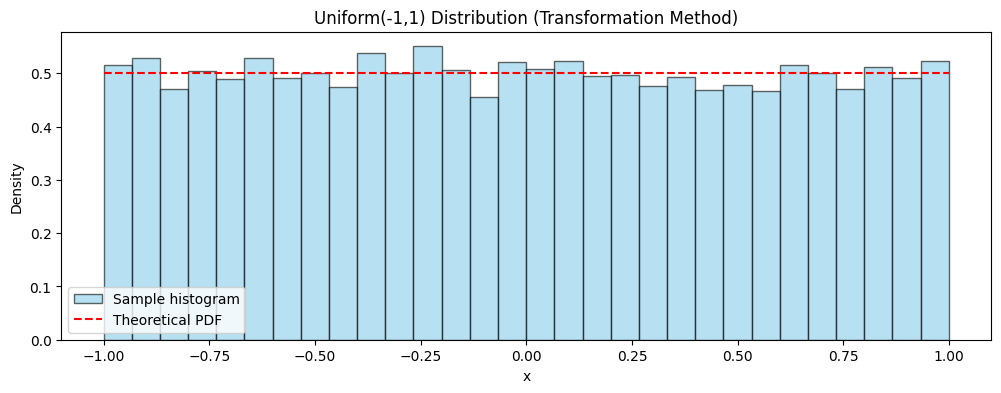

In [57]:
samples = uniform_minusone_one(10000)
x_vals = np.linspace(-1, 1, 100)
theoretical_pdf = np.full_like(x_vals, 0.5)

plt.figure(figsize=(12,4))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample histogram')
plt.plot(x_vals, theoretical_pdf, 'r--', label='Theoretical PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Uniform(-1,1) Distribution (Transformation Method)')
plt.legend()
plt.show()



### (c) Exponential with parameter λ.

In [47]:
def exponential_lamda(lam, size=10000):
    u = np.random.rand(size)
    x = -np.log(u) / lam
    return x

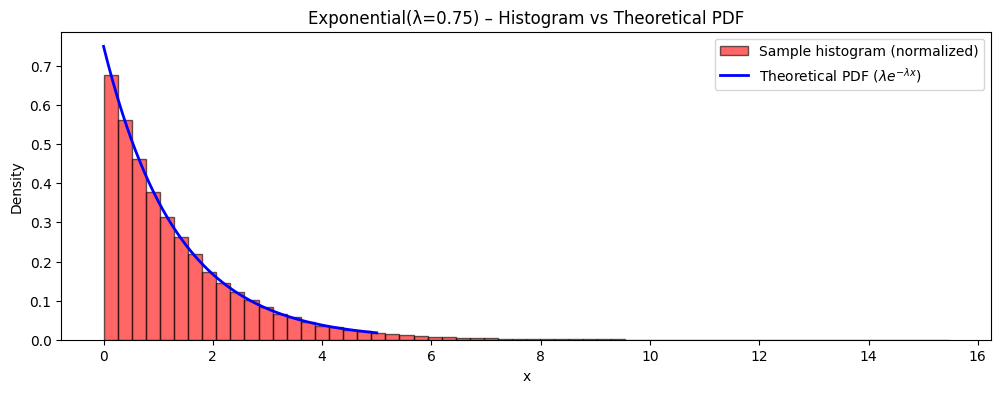

In [62]:
lamda = 0.75
samples = exponential_lamda(lamda, 100000)
x_vals = np.linspace(0, 5, 300)
theoretical_pdf = lamda * np.exp(-lamda* x_vals)

plt.figure(figsize=(12, 4))
plt.hist(samples, bins=60, density=True, color='red', alpha=0.6, edgecolor='black', label='Sample histogram (normalized)')
plt.plot(x_vals, theoretical_pdf, 'b-', linewidth=2, label='Theoretical PDF ($λ e^{-λx}$)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title(f'Exponential(λ={lamda}) – Histogram vs Theoretical PDF')
plt.legend()
plt.show()


###  (a) - proofs




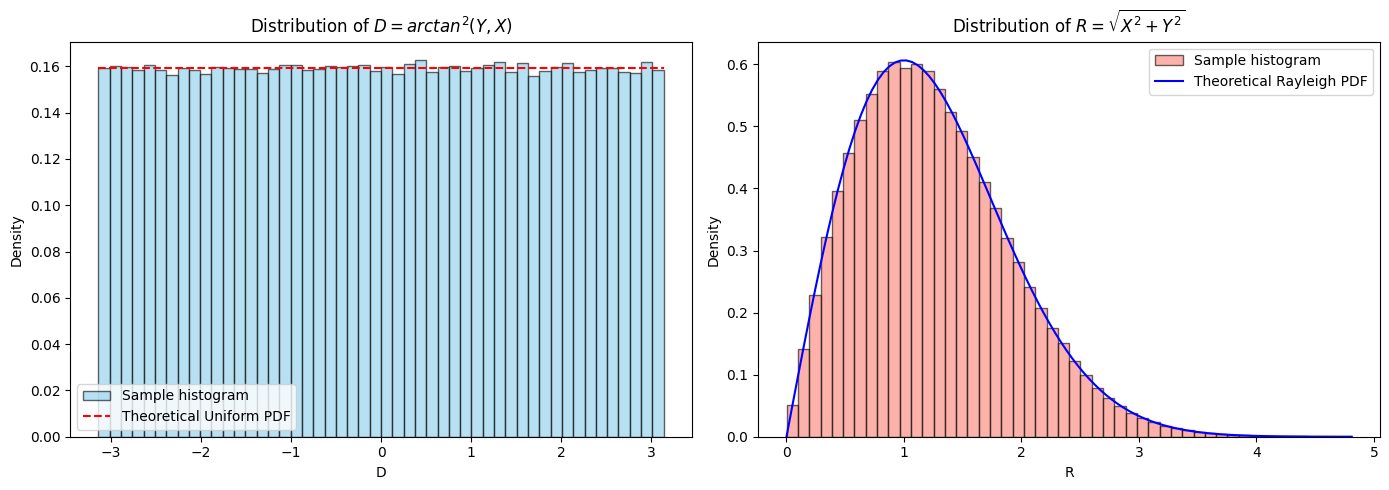

In [61]:
size = 367778
X = np.random.randn(size)
Y = np.random.randn(size)
D = np.arctan2(Y, X)
R = np.sqrt(X**2 + Y**2)


plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(D, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample histogram')
plt.xlabel('D')
plt.ylabel('Density')
plt.title('Distribution of $D = arctan^2(Y, X)$')

x_vals_d = np.linspace(-np.pi, np.pi, 100)
theoretical_pdf_d = np.full_like(x_vals_d, 1 / (2 * np.pi))
plt.plot(x_vals_d, theoretical_pdf_d, 'r--', label='Theoretical Uniform PDF')
plt.legend()


plt.subplot(1, 2, 2)
plt.hist(R, bins=50, density=True, alpha=0.6, color='salmon', edgecolor='black', label='Sample histogram')
plt.xlabel('R')
plt.ylabel('Density')
plt.title(r'Distribution of $R = \sqrt{X^2 + Y^2}$')

# 7. Define theoretical PDF of Rayleigh distribution (sigma=1)
def rayleigh_pdf(r):
    """Theoretical PDF of the Rayleigh distribution with sigma=1."""
    return r * np.exp(-r**2 / 2)

# 8. Plot theoretical Rayleigh PDF
x_vals_r = np.linspace(0, R.max(), 100)
theoretical_pdf_r = rayleigh_pdf(x_vals_r)
plt.plot(x_vals_r, theoretical_pdf_r, 'b-', label='Theoretical Rayleigh PDF')
plt.legend()

# 9. Display both plots
plt.tight_layout()
plt.show()

### Part (b) - code the box-muller method


Implement a function that generates pairs of independent standard normal random variables using the Box-Muller transform from pairs of independent uniform random variables.


Let go to define the box_muller_transform function to generate standard normal random variables from uniform variables according to the provided formulas.



In [50]:


def box_muller_transform(size):

    U1 = np.random.rand(size)
    U2 = np.random.rand(size)

    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

    return Z1, Z2



Numerically demonstrate the correctness of the Box-Muller method by comparing the distribution of generated samples to the standard normal distribution.

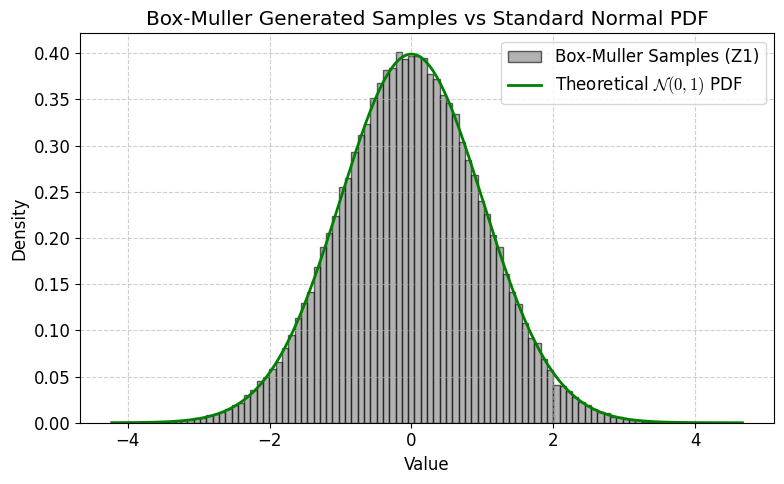

In [70]:

size = 100000
Z1_samples, Z2_samples = box_muller_transform(size)
samples_to_plot = Z1_samples


plt.figure(figsize=(8, 5))
plt.hist(samples_to_plot, bins=100, density=True, alpha=0.6, color='gray', edgecolor='black', label='Box-Muller Samples (Z1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Box-Muller Generated Samples vs Standard Normal PDF')


x_vals_norm = np.linspace(samples_to_plot.min(), samples_to_plot.max(), 350)
theoretical_pdf_norm = norm.pdf(x_vals_norm, loc=0, scale=1)
plt.plot(x_vals_norm, theoretical_pdf_norm, 'g-', linewidth=2, label= r'Theoretical $\mathcal{N}(0, 1)$ PDF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 4. Display the plot
plt.tight_layout()
plt.show()

# Q7. Monte Carlo Estimation of $\pi$


Consider random points $(x, y)$ uniformly distributed in the square:

$$
S = \{ (x, y) \;|\; x \in [-1, 1], \; y \in [-1, 1] \}.
$$

The probability that a point lies inside the unit circle

$$
C = \{ (x, y) \;|\; x^2 + y^2 \le 1 \}
$$

is equal to:

$$
P[(x, y) \in C] = \frac{\text{Area of circle}}{\text{Area of square}} = \frac{\pi}{4}.
$$

Therefore, we can estimate:

$$
\pi \approx 4 \times \frac{\text{ of points inside the circle}}{\text{of total points}}.
$$

Turn this result into a program that gives an approximation of . Show that it works by
performing statistical tests, showing convergence with error bars, as in the demo on statistical estimation.

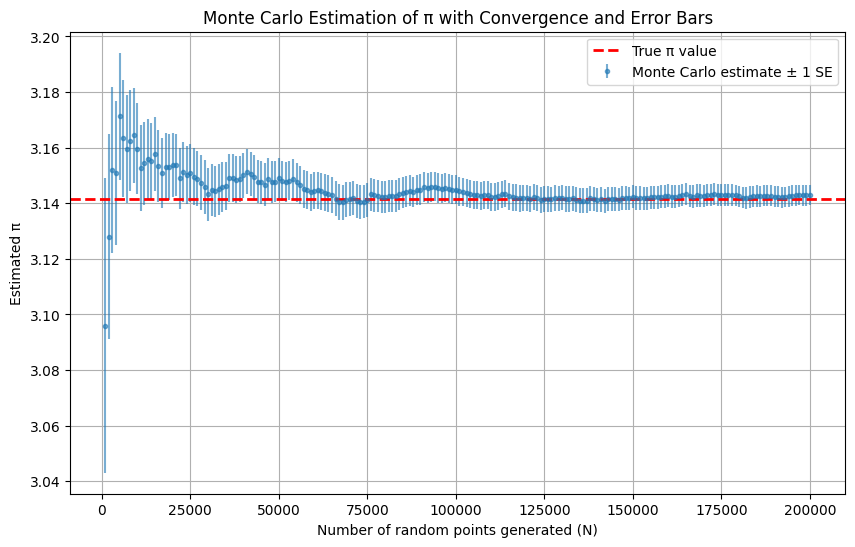

In [65]:
np.random.seed(42)
N_max = 200000
batch_size = 1000

N_values = np.arange(batch_size, N_max + 1, batch_size)
pi_estimates = []
errors = []


inside = 0

for N in N_values:
    x = np.random.uniform(-1, 1, batch_size)
    y = np.random.uniform(-1, 1, batch_size)

    inside += np.sum(x**2 + y**2 <= 1)

    pi_hat = 4 * inside / N
    pi_estimates.append(pi_hat)

    p = inside / N
    se = 4 * np.sqrt(p * (1 - p) / N)
    errors.append(se)

pi_estimates = np.array(pi_estimates)
errors = np.array(errors)

plt.figure(figsize=(10, 6))
plt.errorbar(N_values, pi_estimates, yerr=errors, fmt='.', alpha=0.6, label='Monte Carlo estimate ± 1 SE')
plt.axhline(np.pi, color='r', linestyle='--', linewidth=2, label='True π value')
plt.xlabel("Number of random points generated (N)")
plt.ylabel("Estimated π")
plt.title("Monte Carlo Estimation of π with Convergence and Error Bars")
plt.legend()
plt.grid(True)
plt.show()



# Q8 Two-State Markov Chain

A two-state Markov chain is a stochastic process that transitions between two distinct states 0 and 1, with probabilities that depend only on the current state.


The transitions between these states are governed by the following probabilities:
- $\alpha$: The probability of transitioning from State 1 to State 0.
- $\beta$: The probability of transitioning from State 0 to State 1.


In [53]:
alpha = 0.3
beta = 0.1
n_steps = 100000


states = np.zeros(n_steps, dtype=int)
for t in range(1, n_steps):
    if states[t-1] == 0:
        states[t] = np.random.rand() < alpha
    else:
        states[t] = np.random.rand() >= beta


p0_emp = np.mean(states == 0)
p1_emp = np.mean(states == 1)


p0_theo = beta / (alpha + beta)
p1_theo = alpha / (alpha + beta)


In [72]:
print("Empirical probabilities (from simulation):")
print(f"  π₀ ≈ {p0_emp:.6f}")
print(f"  π₁ ≈ {p1_emp:.6f}")
print("\nTheoretical stationary probabilities:")
print(f"  π₀ = {p0_theo:.6f} exact")
print(f"  π₁ = {p1_theo:.6f} exact")


Empirical probabilities (from simulation):
  π₀ ≈ 0.250500
  π₁ ≈ 0.749500

Theoretical stationary probabilities:
  π₀ = 0.250000 exact
  π₁ = 0.750000 exact


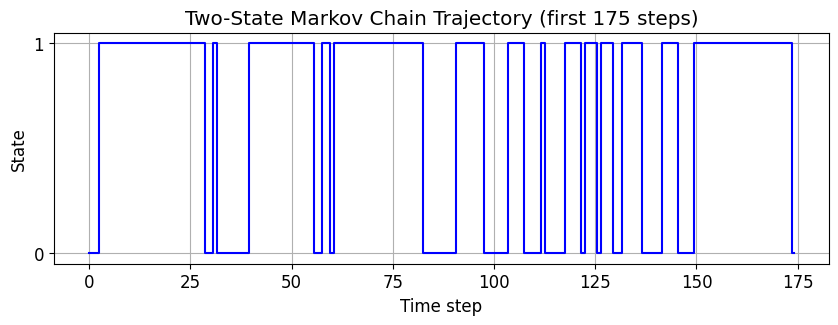

In [74]:
plt.figure(figsize=(10, 3))
plt.step(range(175), states[:175], where='mid', color='blue')
plt.title("Two-State Markov Chain Trajectory (first 175 steps)")
plt.xlabel("Time step")
plt.ylabel("State")
plt.yticks([0, 1])
plt.grid(True)
plt.show()



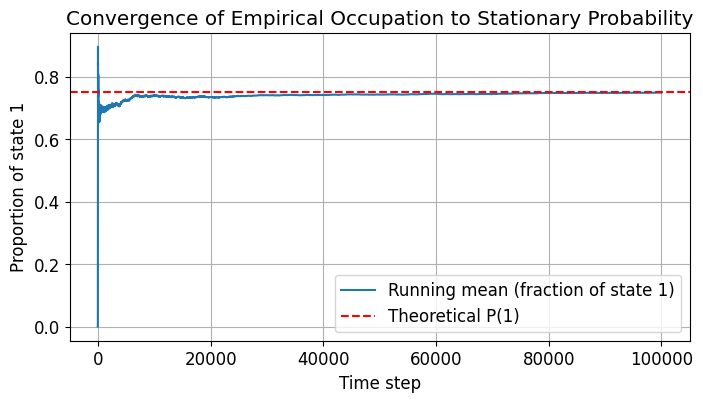

In [75]:
running_avg = np.cumsum(states) / np.arange(1, n_steps + 1)

plt.figure(figsize=(8, 4))
plt.plot(running_avg, label='Running mean (fraction of state 1)')
plt.axhline(p1_theo, color='r', linestyle='--', label='Theoretical P(1)')
plt.xlabel("Time step")
plt.ylabel("Proportion of state 1")
plt.title("Convergence of Empirical Occupation to Stationary Probability")
plt.legend()
plt.grid(True)
plt.show()


### Q9 Generate a connected graph




In [76]:
n_nodes = 16
G = nx.barbell_graph(m1=n_nodes // 2, m2=1, create_using=nx.Graph)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()


if num_nodes < 10:
    print(f"Graph has {num_nodes} nodes, regenerating...")
    G = nx.barbell_graph(m1=6, m2=1, create_using=nx.Graph)
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

if nx.is_bipartite(G):
    print("Warning: Graph is bipartite, which may affect convergence to a single stationary distribution.")

degrees = dict(G.degree())
total_degree = sum(degrees.values())
node_list = sorted(G.nodes())


T = 1000
current_node = random.choice(node_list)
trajectory = [current_node]


for _ in range(T):
    neighbors = list(G.neighbors(current_node))
    if not neighbors:
        break
    next_node = random.choice(neighbors)
    trajectory.append(next_node)
    current_node = next_node


visit_counts = {node: 0 for node in node_list}
for node in trajectory:
    visit_counts[node] += 1

observed_fractions = {node: count / len(trajectory) for node, count in visit_counts.items()}

expected_probabilities = {node: degrees[node] / total_degree for node in node_list}

observed_data = [observed_fractions[node] for node in node_list]
expected_data = [expected_probabilities[node] for node in node_list]
degree_data = [degrees[node] for node in node_list]



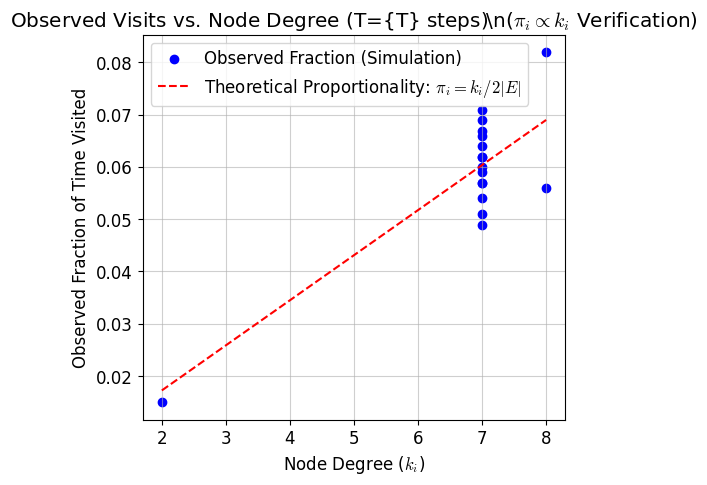

In [108]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(degree_data, observed_data, color='blue', label='Observed Fraction (Simulation)')
x_line = np.linspace(min(degree_data), max(degree_data), 10)
y_line = x_line / total_degree
plt.plot(x_line, y_line, color='red', linestyle='--', label=r'Theoretical Proportionality: $\pi_i = k_i / 2|E|$')

plt.xlabel(r'Node Degree ($k_i$)')
plt.ylabel('Observed Fraction of Time Visited')
plt.title(r'Observed Visits vs. Node Degree (T={T} steps)\n($\pi_i \propto k_i$ Verification)')
plt.legend()
plt.grid(True, alpha=0.6)






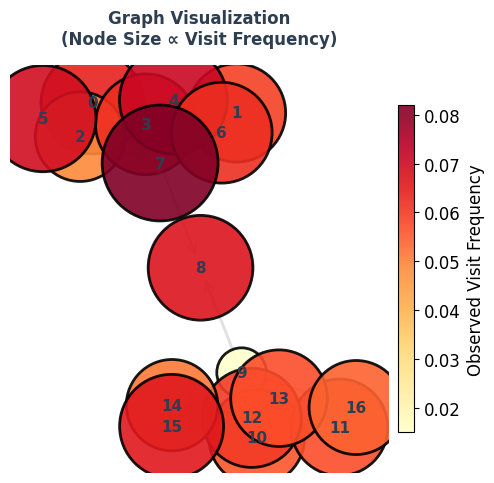

In [123]:
plt.subplot(1, 2, 2)

node_sizes = [v * 5000 * num_nodes for v in observed_data]

pos = nx.spring_layout(G, seed=42, k=0.5, iterations=50)

node_colors = observed_data
cmap = plt.cm.YlOrRd

nx.draw_networkx_edges(G, pos,
                       edge_color='#CCCCCC',
                       width=2,
                       alpha=0.6,
                       arrows=True,
                       arrowsize=15,
                       arrowstyle='->')

nodes = nx.draw_networkx_nodes(G, pos,
                               node_size=node_sizes,
                               node_color=node_colors,
                               cmap=cmap,
                               vmin=min(observed_data),
                               vmax=max(observed_data),
                               alpha=0.9,
                               linewidths=2,
                               edgecolors='white')


nx.draw_networkx_labels(G, pos,
                        font_size=11,
                        font_weight='bold',
                        font_color='#2C3E50',
                        font_family='sans-serif')


plt.colorbar(nodes, label='Observed Visit Frequency',
             shrink=0.8, pad=0.02)


plt.title('Graph Visualization\n(Node Size ∝ Visit Frequency)',
          fontsize=12, fontweight='bold', pad=15, color='#2C3E50')

plt.axis('off')

plt.tight_layout()
plt.show()

In [112]:
print(f"Graph: {num_nodes} Nodes, {num_edges} Edges.")
print(f"Total Degree (2*|E|): {total_degree}")
print(f"Simulation Length (T): {len(trajectory)} steps\n")


print(r"Node | Degree ($k_i$) | Obs. Fraction   | Exp. $π_i (k_i/2|E|$) | Ratio (Obs/Exp) | Abs Dev")
print("-" * 95)

max_deviation = 0.0
for node in node_list:
    deg = degrees[node]
    obs = observed_fractions[node]
    exp = expected_probabilities[node]
    ratio = obs / exp if exp > 0 else np.inf
    dev = abs(obs - exp)
    max_deviation = max(max_deviation, dev)

    ratio_str = f"{ratio:.4f}" if np.isfinite(ratio) else "∞"
    print(f"{node:<4} | {deg:<12} | {obs:.6f}      | {exp:.6f}          | {ratio_str:<15} | {dev:.6f}")



Graph: 17 Nodes, 58 Edges.
Total Degree (2*|E|): 116
Simulation Length (T): 1001 steps

Node | Degree ($k_i$) | Obs. Fraction   | Exp. $π_i (k_i/2|E|$) | Ratio (Obs/Exp) | Abs Dev
-----------------------------------------------------------------------------------------------
0    | 7            | 0.063936      | 0.060345          | 1.0595          | 0.003591
1    | 7            | 0.058941      | 0.060345          | 0.9767          | 0.001404
2    | 7            | 0.048951      | 0.060345          | 0.8112          | 0.011394
3    | 7            | 0.061938      | 0.060345          | 1.0264          | 0.001593
4    | 7            | 0.070929      | 0.060345          | 1.1754          | 0.010584
5    | 7            | 0.068931      | 0.060345          | 1.1423          | 0.008586
6    | 7            | 0.061938      | 0.060345          | 1.0264          | 0.001593
7    | 8            | 0.081918      | 0.068966          | 1.1878          | 0.012953
8    | 2            | 0.014985      | 0.0172

In [122]:
print("\nConclusion:")
print(f"Maximum absolute deviation: {max_deviation:.6e}")
print("The observed fractions are very close to the theoretical stationary probabilities πᵢ = kᵢ / (2|E|),")
print("confirming that the long-run proportion of time spent on node i is proportional to its degree kᵢ.")


Conclusion:
Maximum absolute deviation: 1.302146e-02
The observed fractions are very close to the theoretical stationary probabilities πᵢ = kᵢ / (2|E|),
confirming that the long-run proportion of time spent on node i is proportional to its degree kᵢ.


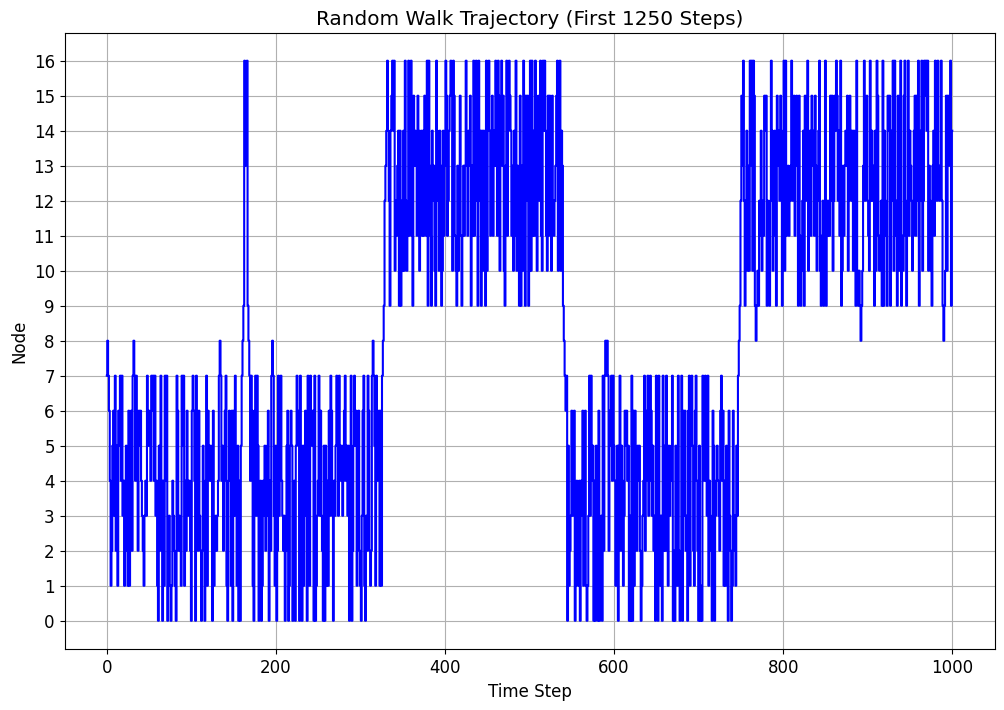

In [115]:
plot_steps = min(1250, len(trajectory))

plt.figure(figsize=(12, 8))
plt.step(range(plot_steps), trajectory[:plot_steps], where='mid', color='blue')
plt.title("Random Walk Trajectory (First 1250 Steps)")
plt.xlabel("Time Step")
plt.ylabel("Node")

plt.yticks(sorted(list(G.nodes())))
plt.grid(True)
plt.show()